In [10]:
import pandas as pd
import sys
from pathlib import Path
from plotnine import *

sys.path.insert(0, str(Path.cwd()))
from analysis import read_benchmarks

In [11]:
# Load benchmark data
dfr = read_benchmarks()
print(f"Loaded {len(dfr)} benchmark results")
dfr.head()

Loaded 75 benchmark results


,date,version,commit_id,filename,runtime,cpu,origin,group,experiment,sampleSize,category,n_samples,min_ns,max_ns,avg_ns,p75_ns,p99_ns,p995_ns,p999_ns
0,2025-11-30 13:19:48+00:00,0.0.24,5a7971a652020d4100ba6d59442c93dfff83b823,bench_2025-11-30T13:19:48+00:00.json,Deno/1.46.3 x86_64-unknown-linux-gnu,AMD Ryzen 7 7840U w/ Radeon 780M Graphics,file:///home/rg/Code/tribbledb/benchmark/delet...,TribbleDB Deletion (NodeID),Delete Triples,1000,"NodeID, high uniqueness",120,672462.0,3023900.0,1104717.0,1292016.0,2951255.0,3023900.0,3023900.0
1,2025-11-30 13:19:48+00:00,0.0.24,5a7971a652020d4100ba6d59442c93dfff83b823,bench_2025-11-30T13:19:48+00:00.json,Deno/1.46.3 x86_64-unknown-linux-gnu,AMD Ryzen 7 7840U w/ Radeon 780M Graphics,file:///home/rg/Code/tribbledb/benchmark/delet...,TribbleDB Deletion (NodeID),Delete Triples,5000,"NodeID, high uniqueness",28,4607439.0,11903863.0,7019199.0,8545049.0,11903863.0,11903863.0,11903863.0
2,2025-11-30 13:19:48+00:00,0.0.24,5a7971a652020d4100ba6d59442c93dfff83b823,bench_2025-11-30T13:19:48+00:00.json,Deno/1.46.3 x86_64-unknown-linux-gnu,AMD Ryzen 7 7840U w/ Radeon 780M Graphics,file:///home/rg/Code/tribbledb/benchmark/delet...,TribbleDB Deletion (NodeID),Delete Triples,10000,"NodeID, high uniqueness",16,18387350.0,40615370.0,27645955.0,33502519.0,40615370.0,40615370.0,40615370.0
3,2025-11-30 13:19:48+00:00,0.0.24,5a7971a652020d4100ba6d59442c93dfff83b823,bench_2025-11-30T13:19:48+00:00.json,Deno/1.46.3 x86_64-unknown-linux-gnu,AMD Ryzen 7 7840U w/ Radeon 780M Graphics,file:///home/rg/Code/tribbledb/benchmark/delet...,TribbleDB Deletion (NodeID),Delete Triples,50000,"NodeID, high uniqueness",12,104113942.0,142098134.0,116238948.0,117178672.0,142098134.0,142098134.0,142098134.0
4,2025-11-30 13:19:48+00:00,0.0.24,5a7971a652020d4100ba6d59442c93dfff83b823,bench_2025-11-30T13:19:48+00:00.json,Deno/1.46.3 x86_64-unknown-linux-gnu,AMD Ryzen 7 7840U w/ Radeon 780M Graphics,file:///home/rg/Code/tribbledb/benchmark/delet...,TribbleDB Deletion (NodeID),Delete Triples,100000,"NodeID, high uniqueness",11,199329281.0,425313738.0,272845078.0,316790665.0,425313738.0,425313738.0,425313738.0


In [12]:
# Filter for the most recent date
max_date = dfr['date'].max()
recent_dfr = dfr[dfr['date'] == max_date].copy()

print(f"Filtered to date: {max_date}")
print(f"Records: {len(recent_dfr)}")
print(f"Experiments: {recent_dfr['experiment'].unique()}")

Filtered to date: 2025-11-30 13:19:48+00:00
Records: 75
Experiments: ['Delete Triples' 'Insert Triples' 'SearchFlatMap']


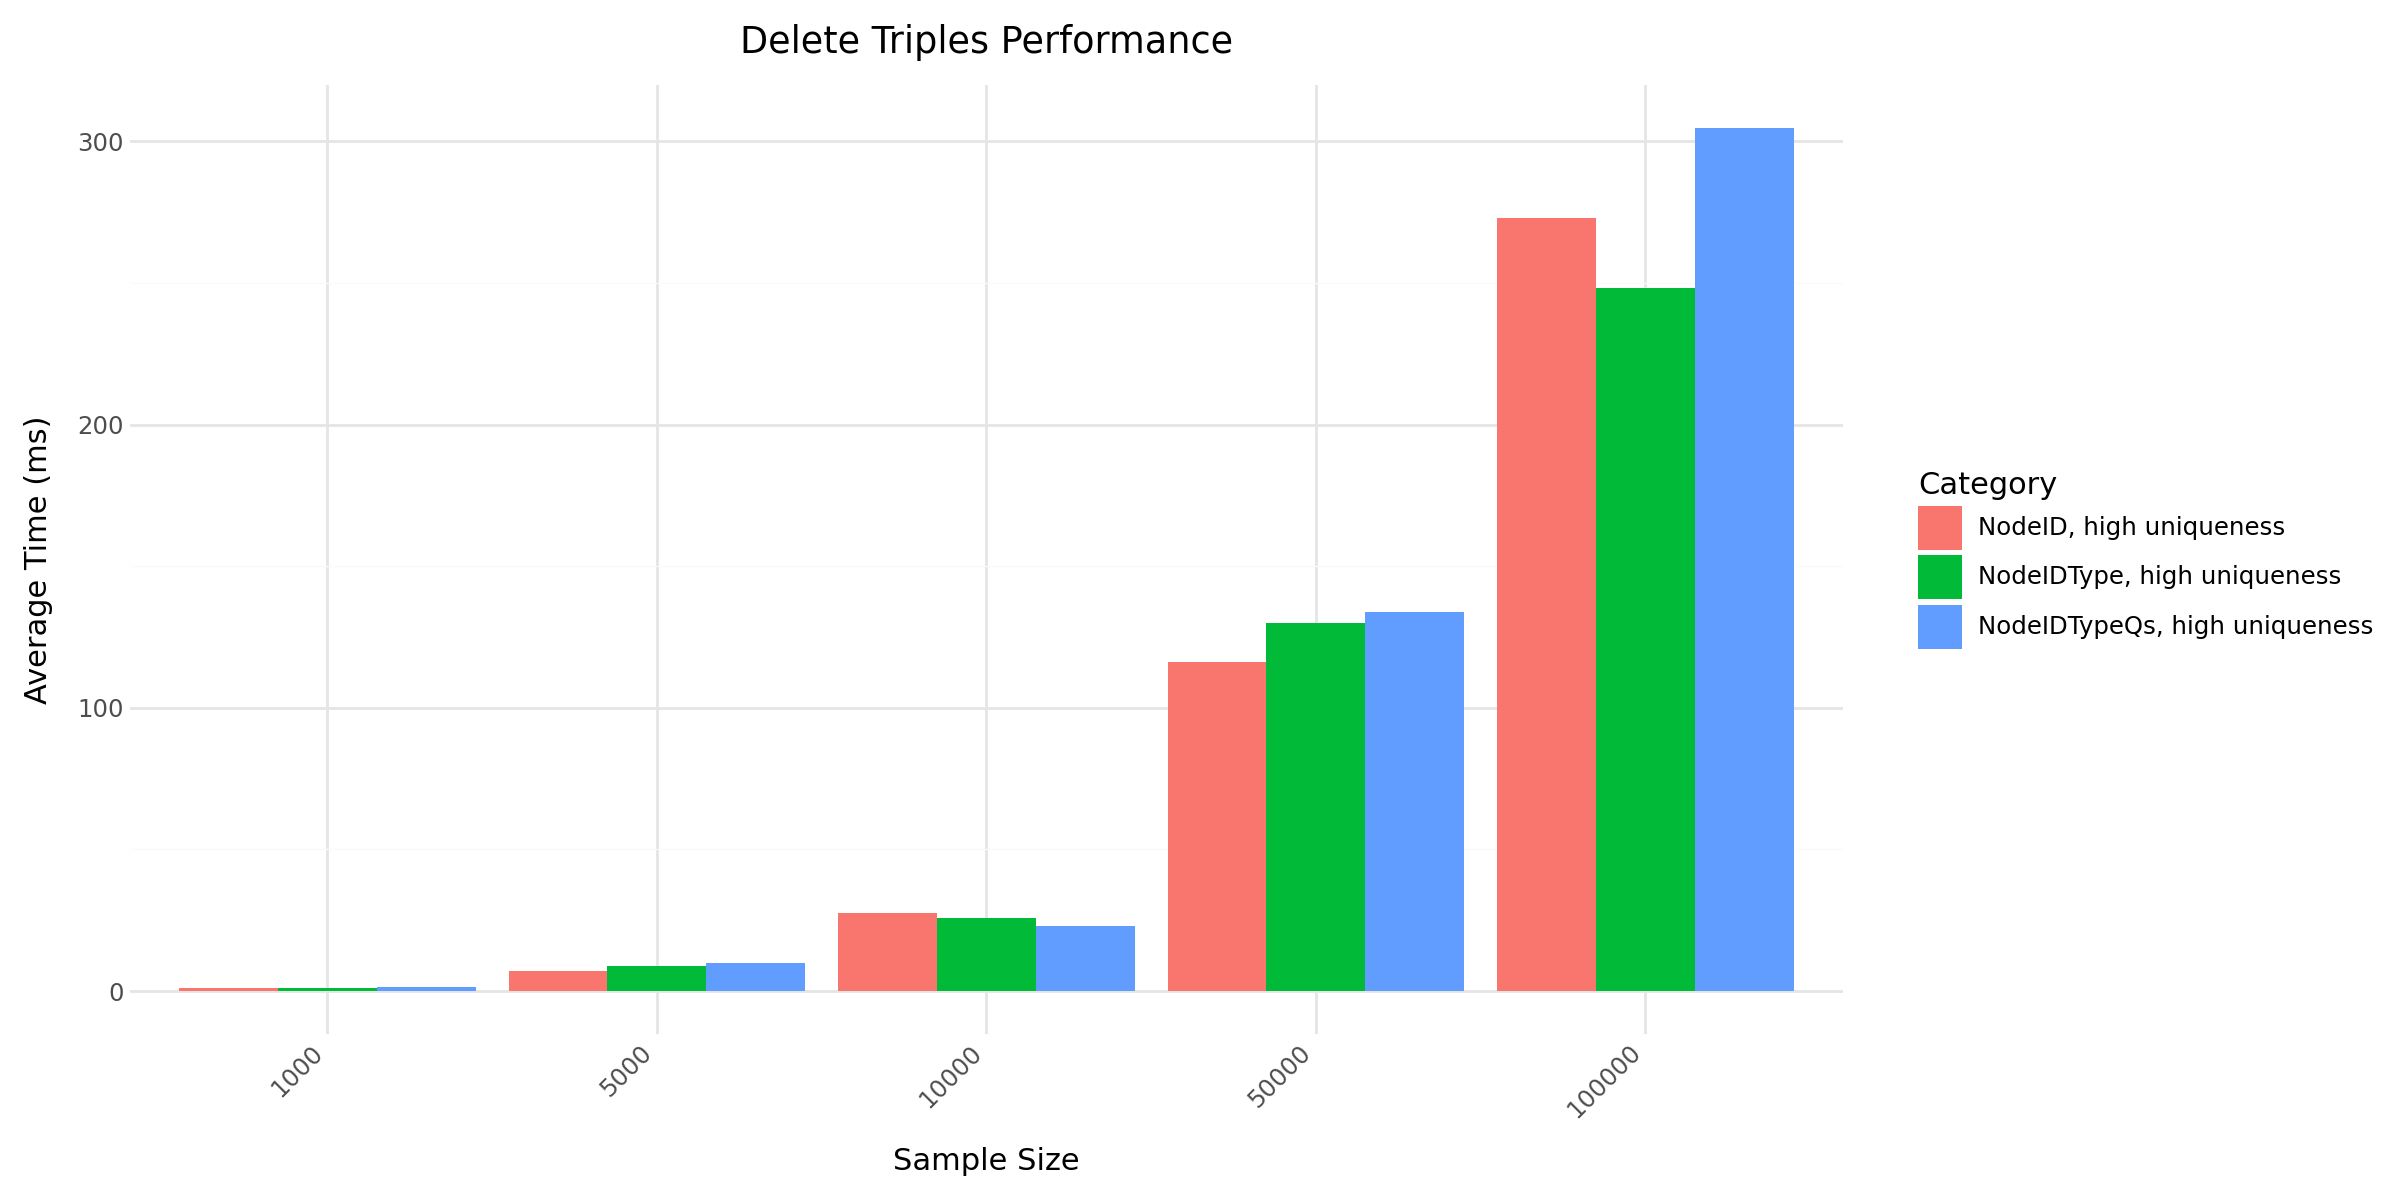

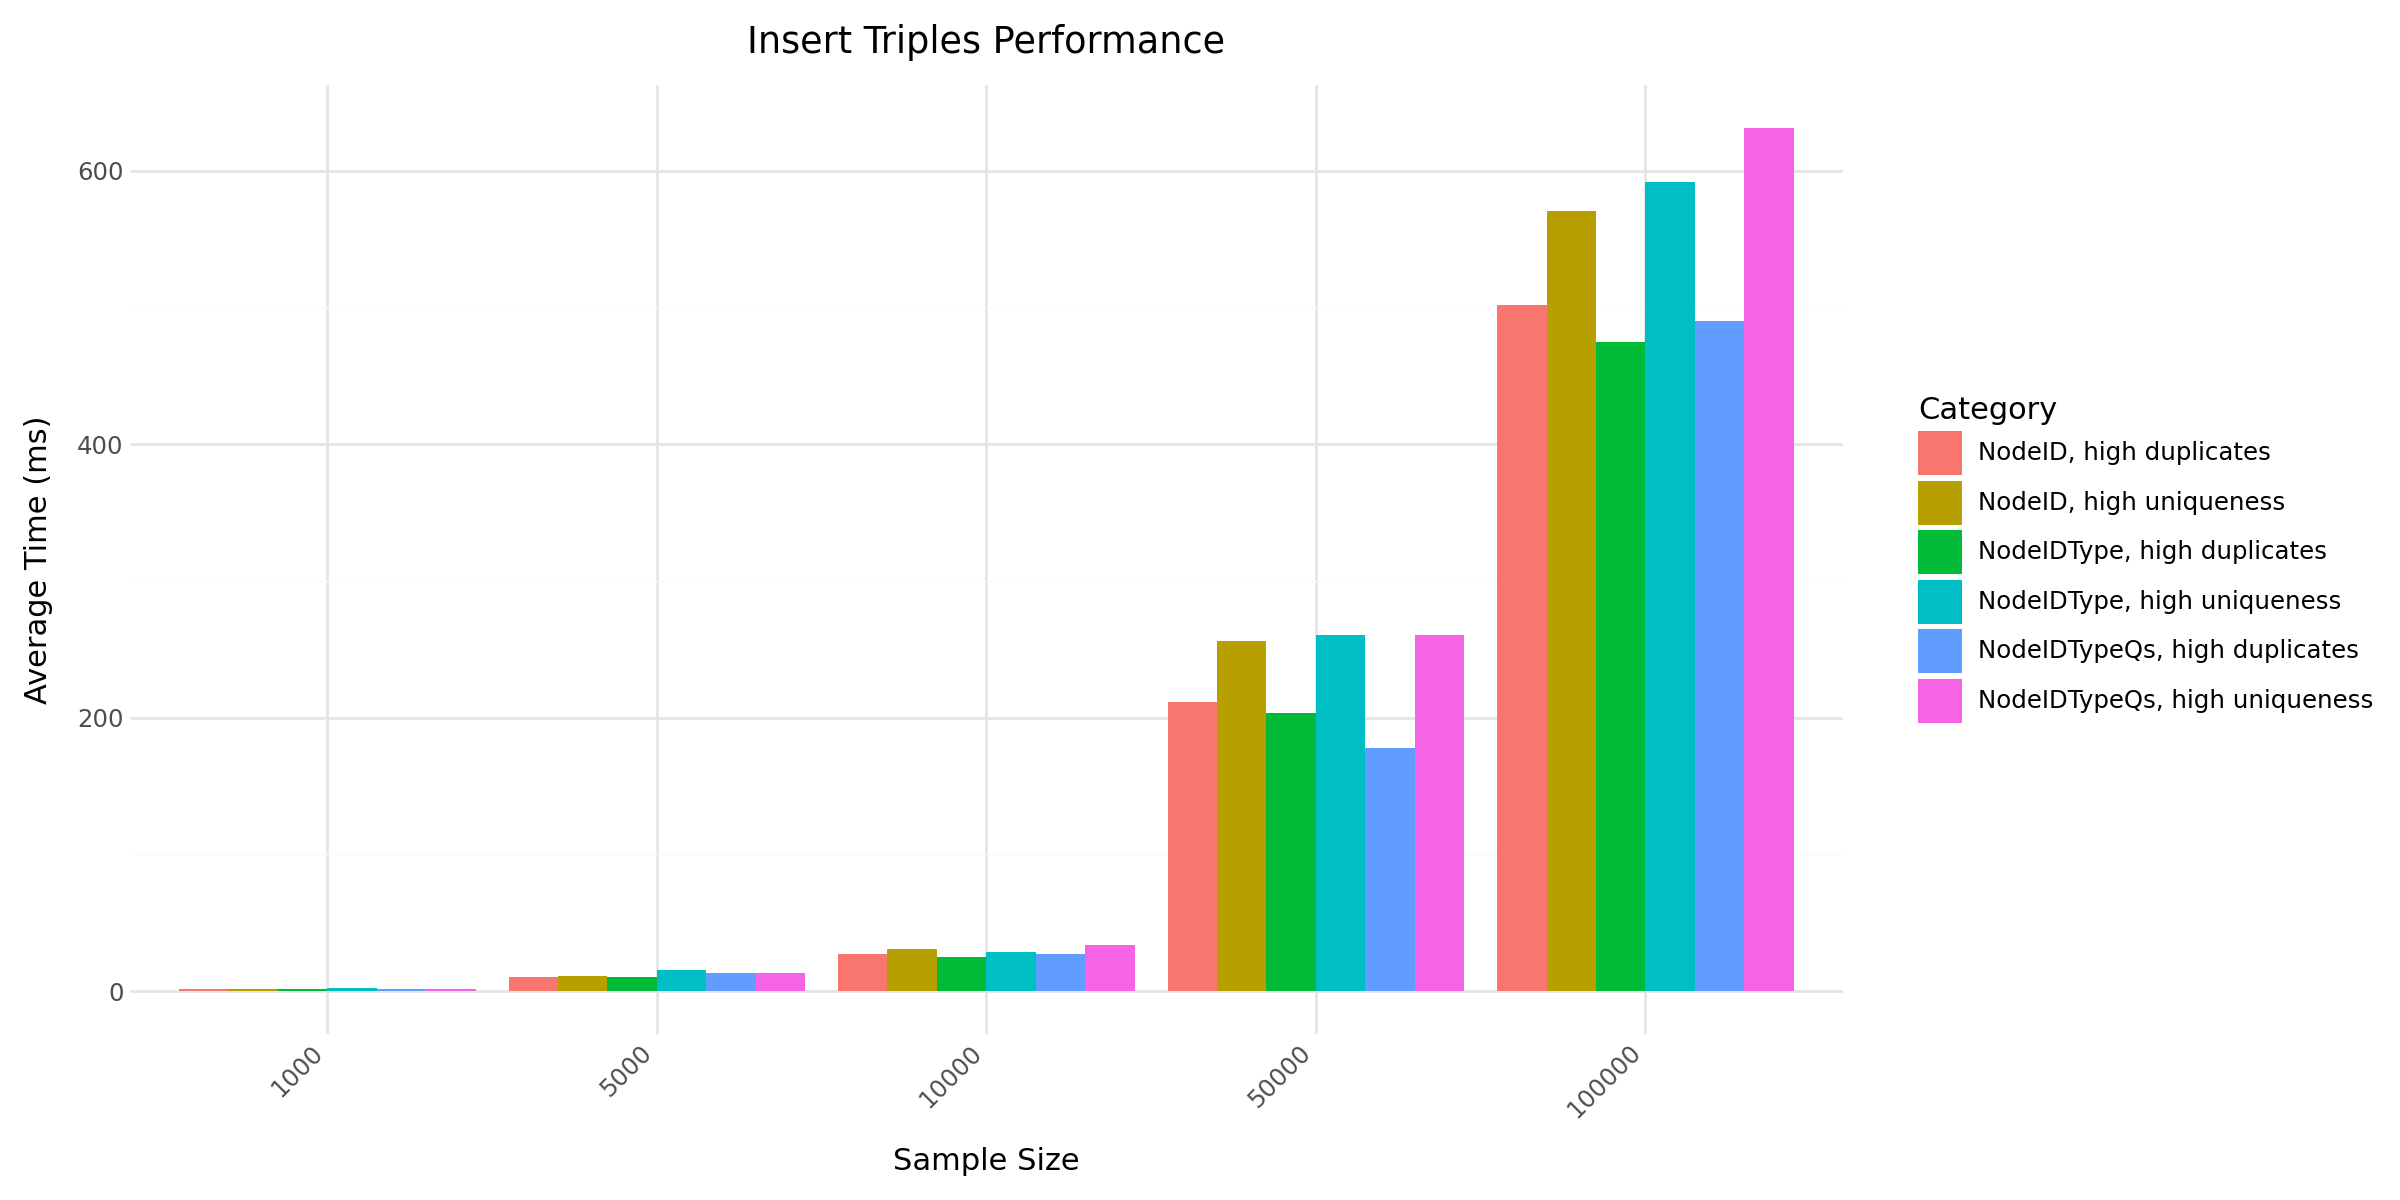

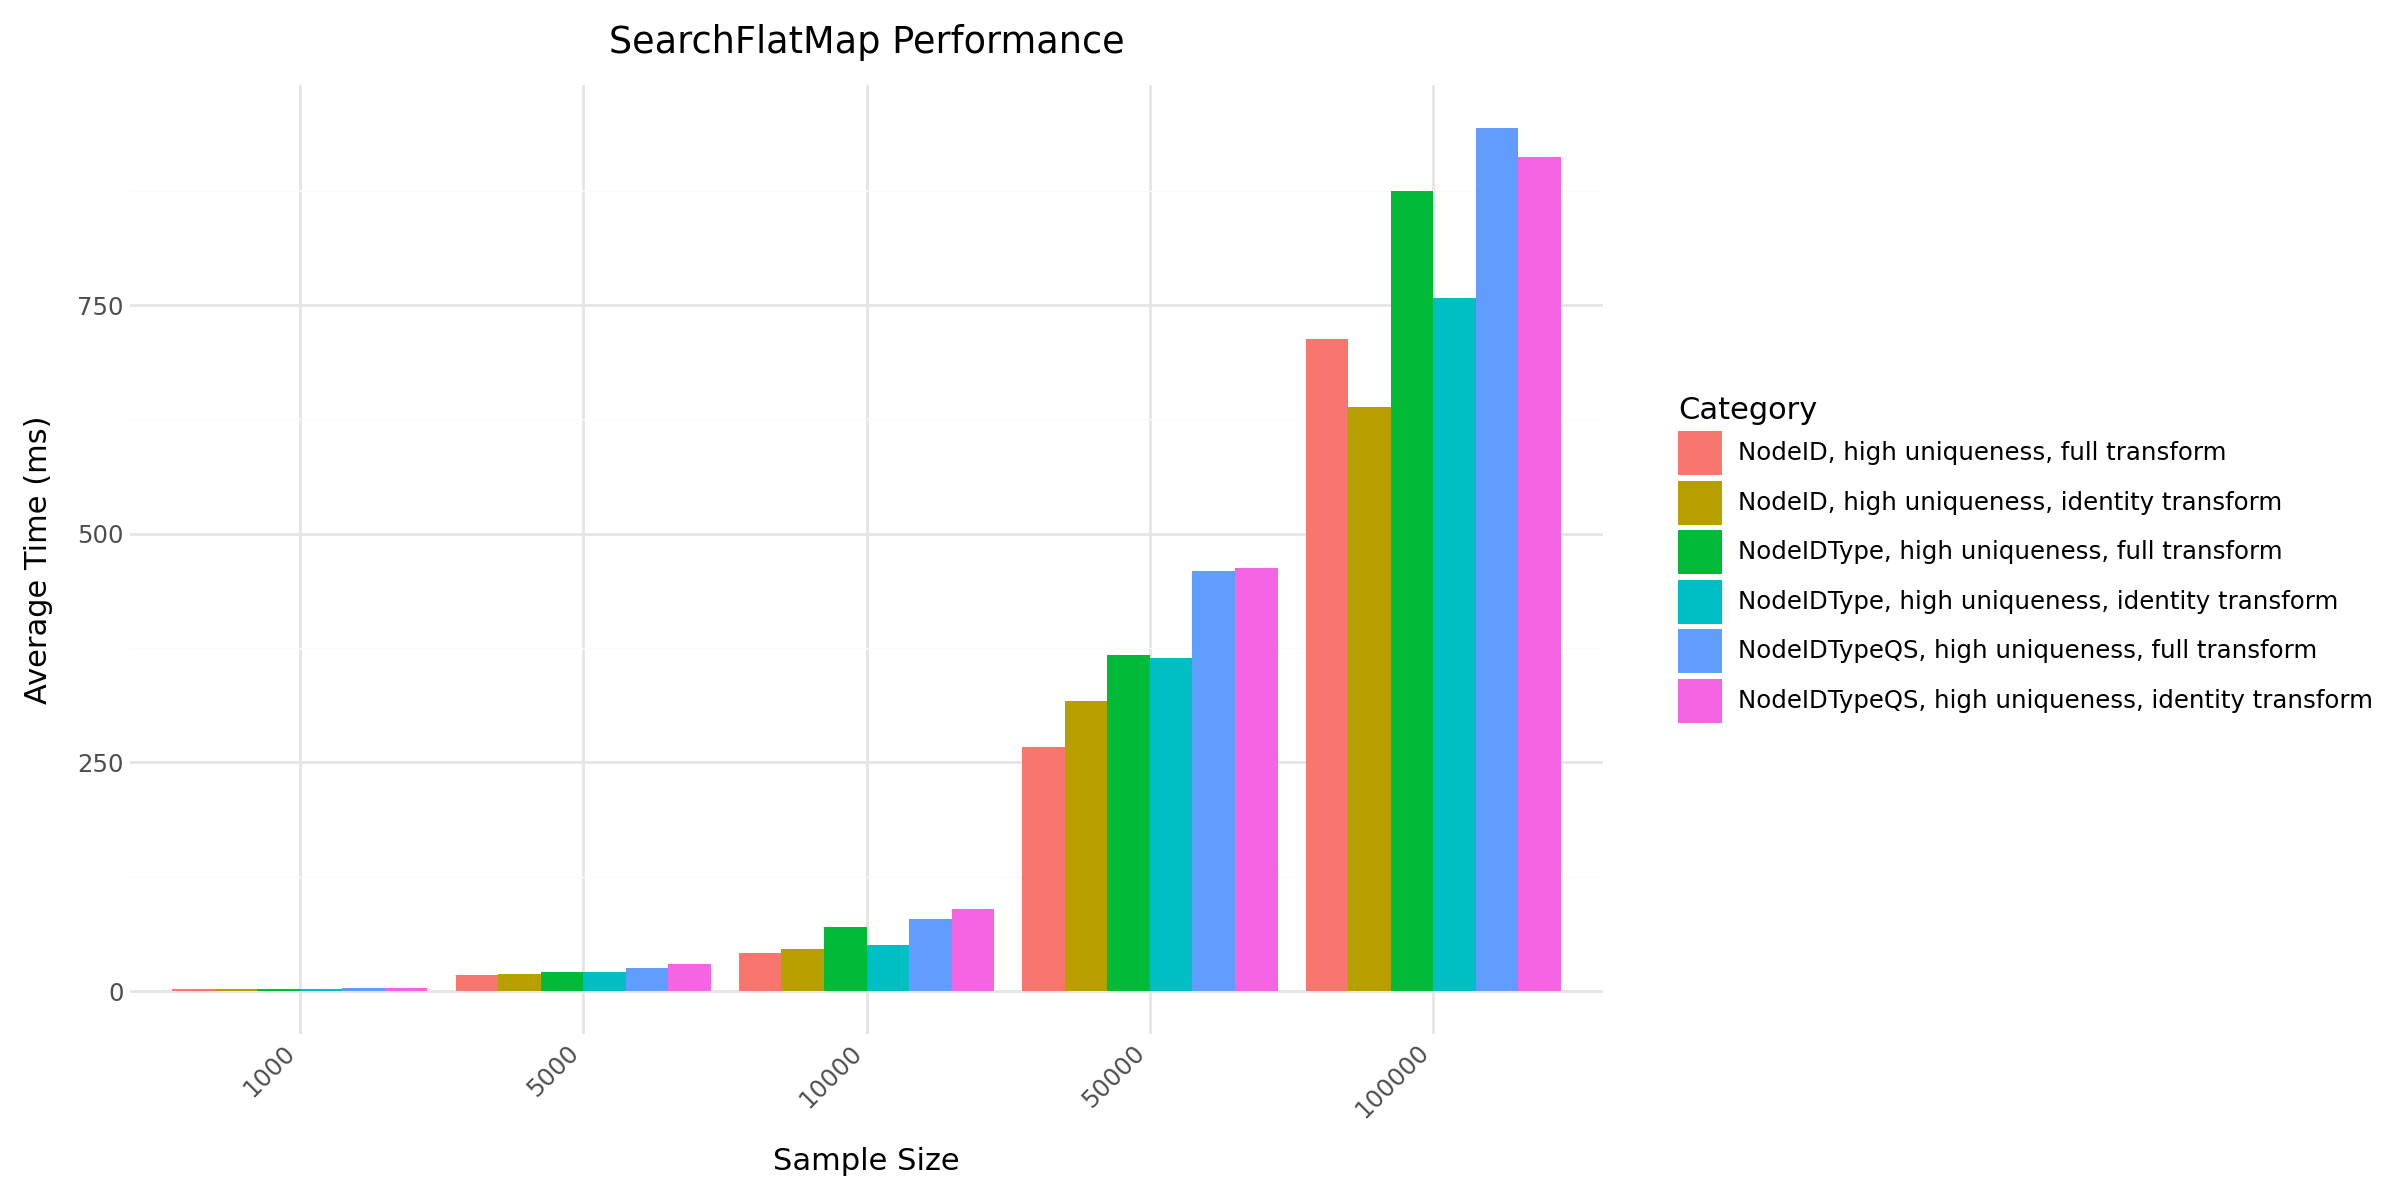

In [13]:
# Create bar plots for each experiment
experiments = recent_dfr['experiment'].unique()

for experiment in experiments:
    exp_data = recent_dfr[recent_dfr['experiment'] == experiment].copy()
    exp_data['avg_ms'] = exp_data['avg_ns'] / 1_000_000

    plot = (
        ggplot(exp_data, aes(x='factor(sampleSize)', y='avg_ms', fill='category'))
        + geom_bar(stat='identity', position='dodge')
        + labs(
            title=f'{experiment} Performance',
            x='Sample Size',
            y='Average Time (ms)',
            fill='Category'
        )
        + theme_minimal()
        + theme(
            axis_text_x=element_text(rotation=45, hjust=1),
            figure_size=(12, 6)
        )
    )

    display(plot)